In [55]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import numpy as np
import casadi as ca
from plotting_functions import  compare_tracking_errors, \
                                compare_outputs_box_whiskers, \
                                plot_experiment_dashboard, \
                                plot_animation,compare_outputs, \
                                compare_sum_sqr_outputs


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
experiment_names = [
    'horizon_1',
    'horizon_5',
    'horizon_10',
    'horizon_20',
    'horizon_50',
    'horizon_100'
]

In [113]:
all_logs = {}
experiment_parameters = {}
for experiment_name in experiment_names:
    with open('experiment_data/'+experiment_name+'.pickle', 'rb') as handle:
        log = pickle.load(handle)
        df_cont = pd.DataFrame(log['log_list'])
        all_logs[experiment_name] = df_cont
        experiment_parameters[experiment_name] = log['experiment_parameters']

In [114]:
keys = list(all_logs.keys())
keys.sort()
keys.sort(key=len)
print(keys)

['horizon_1', 'horizon_5', 'horizon_10', 'horizon_20', 'horizon_50', 'horizon_100']


### Tracking errors

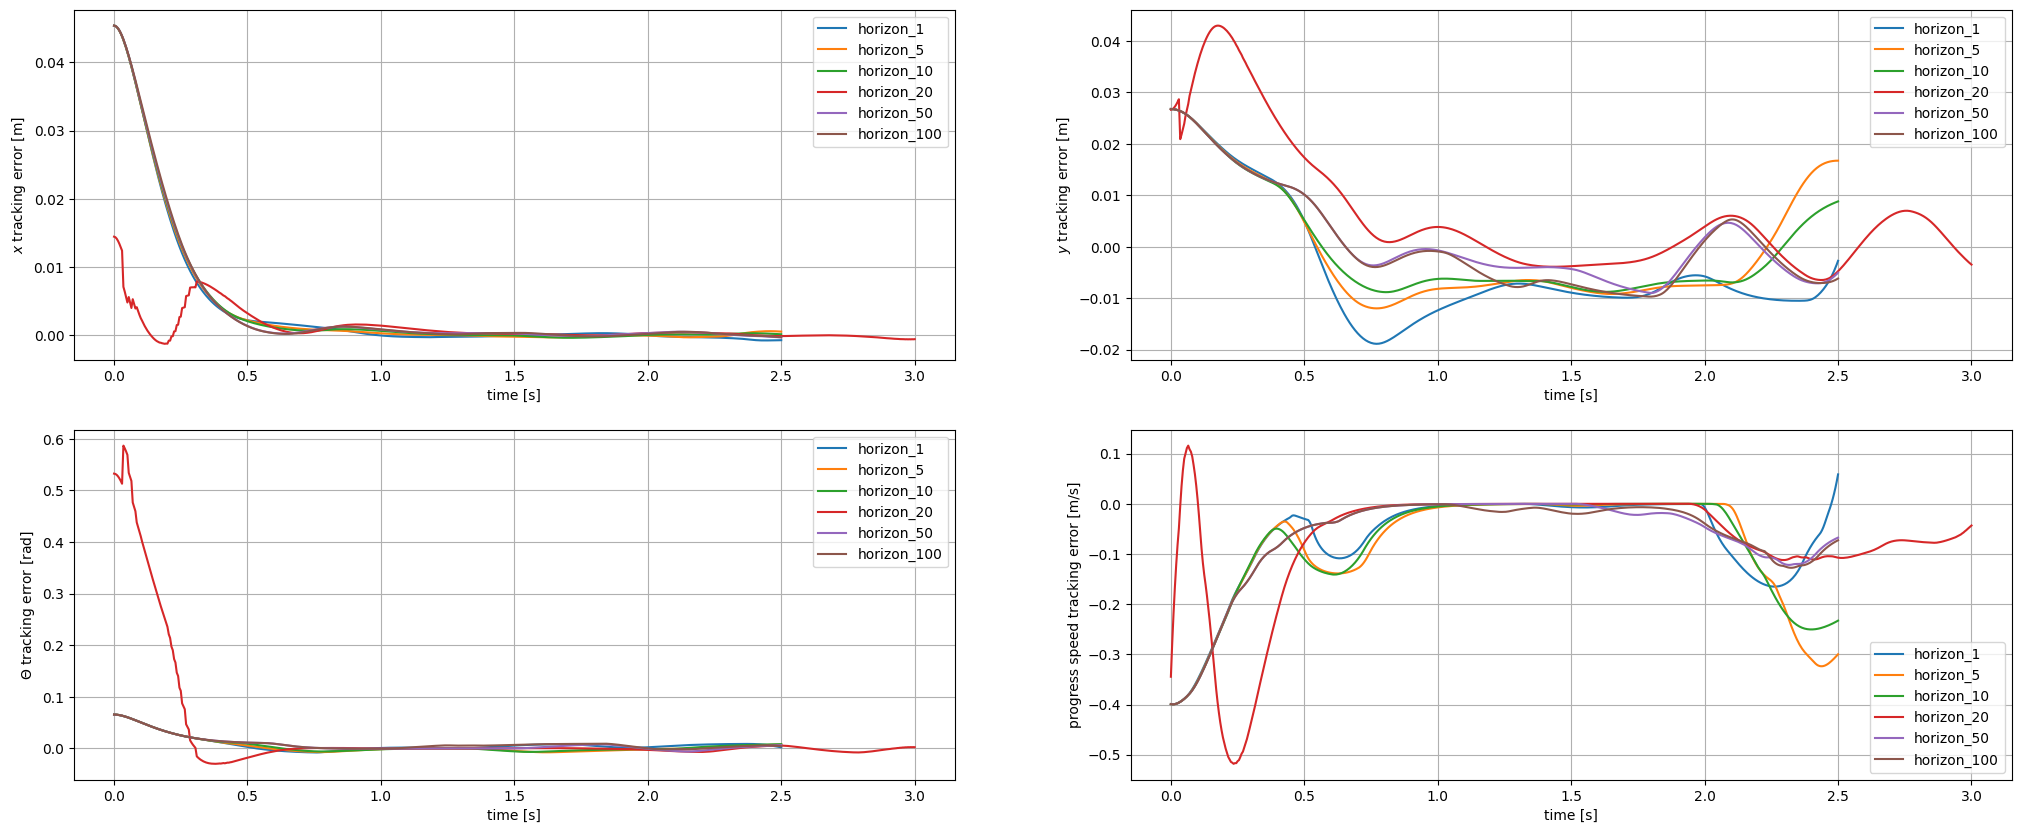

In [115]:
compare_tracking_errors(all_logs,keys)
# compare_tracking_errors(all_logs,['horizon_1', 'horizon_500'])

ValueError: x and y must have same first dimension, but have shapes (501,) and (601,)

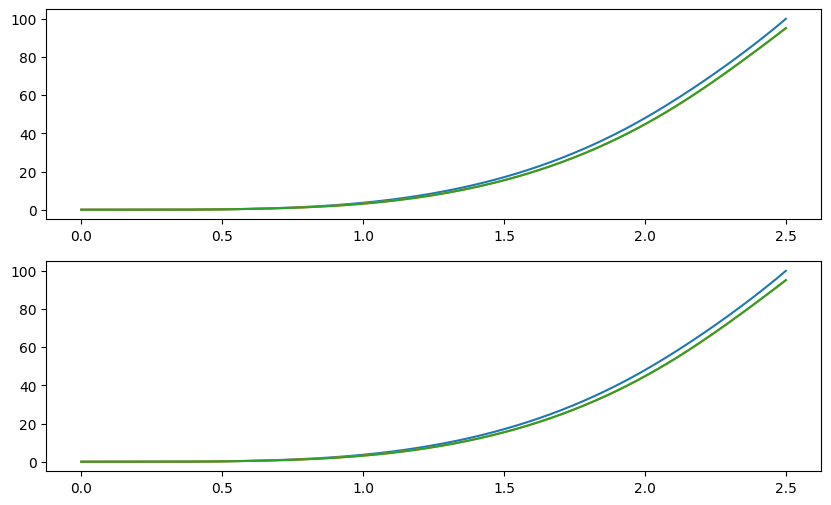

In [116]:
compare_sum_sqr_outputs(all_logs,keys,'x')

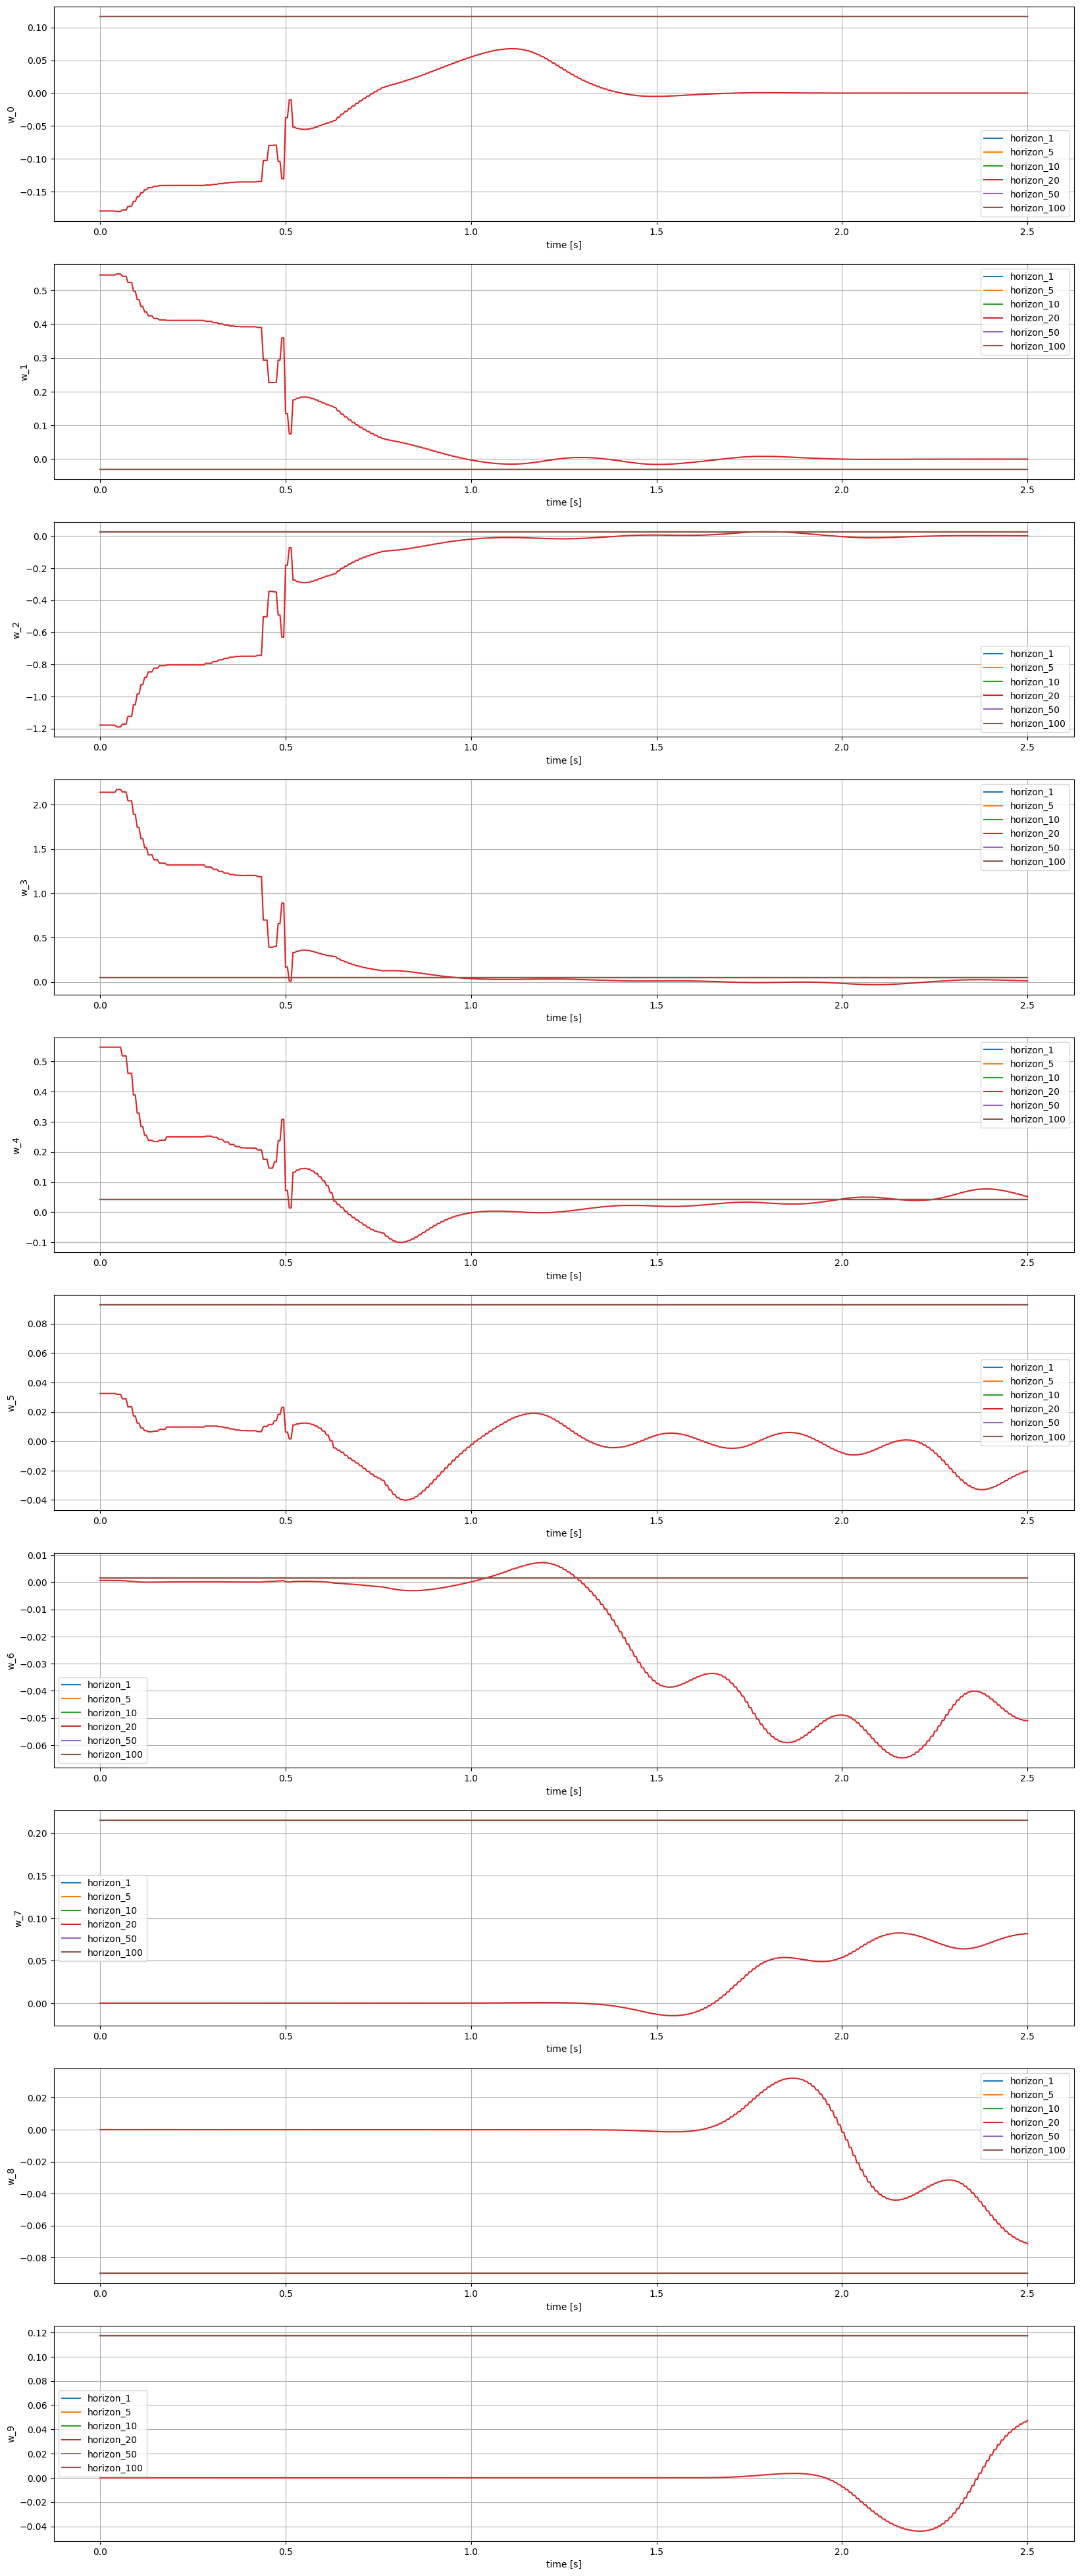

In [77]:
compare_outputs(all_logs,keys,'w')

In [68]:
# compare_outputs(all_logs,keys,'w')

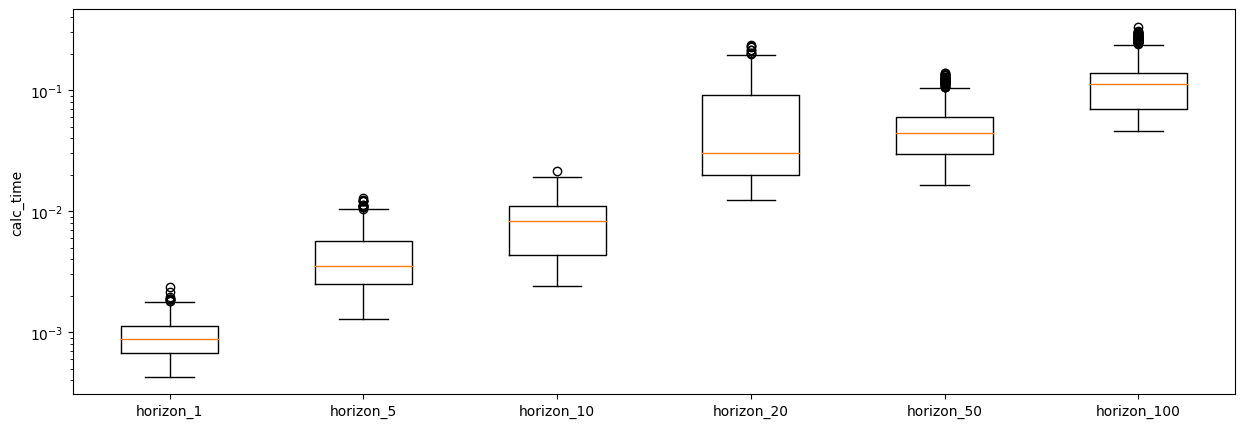

In [118]:
compare_outputs_box_whiskers(
  all_logs,
  keys, 
  # 'iter_count'
  'calc_time'
)

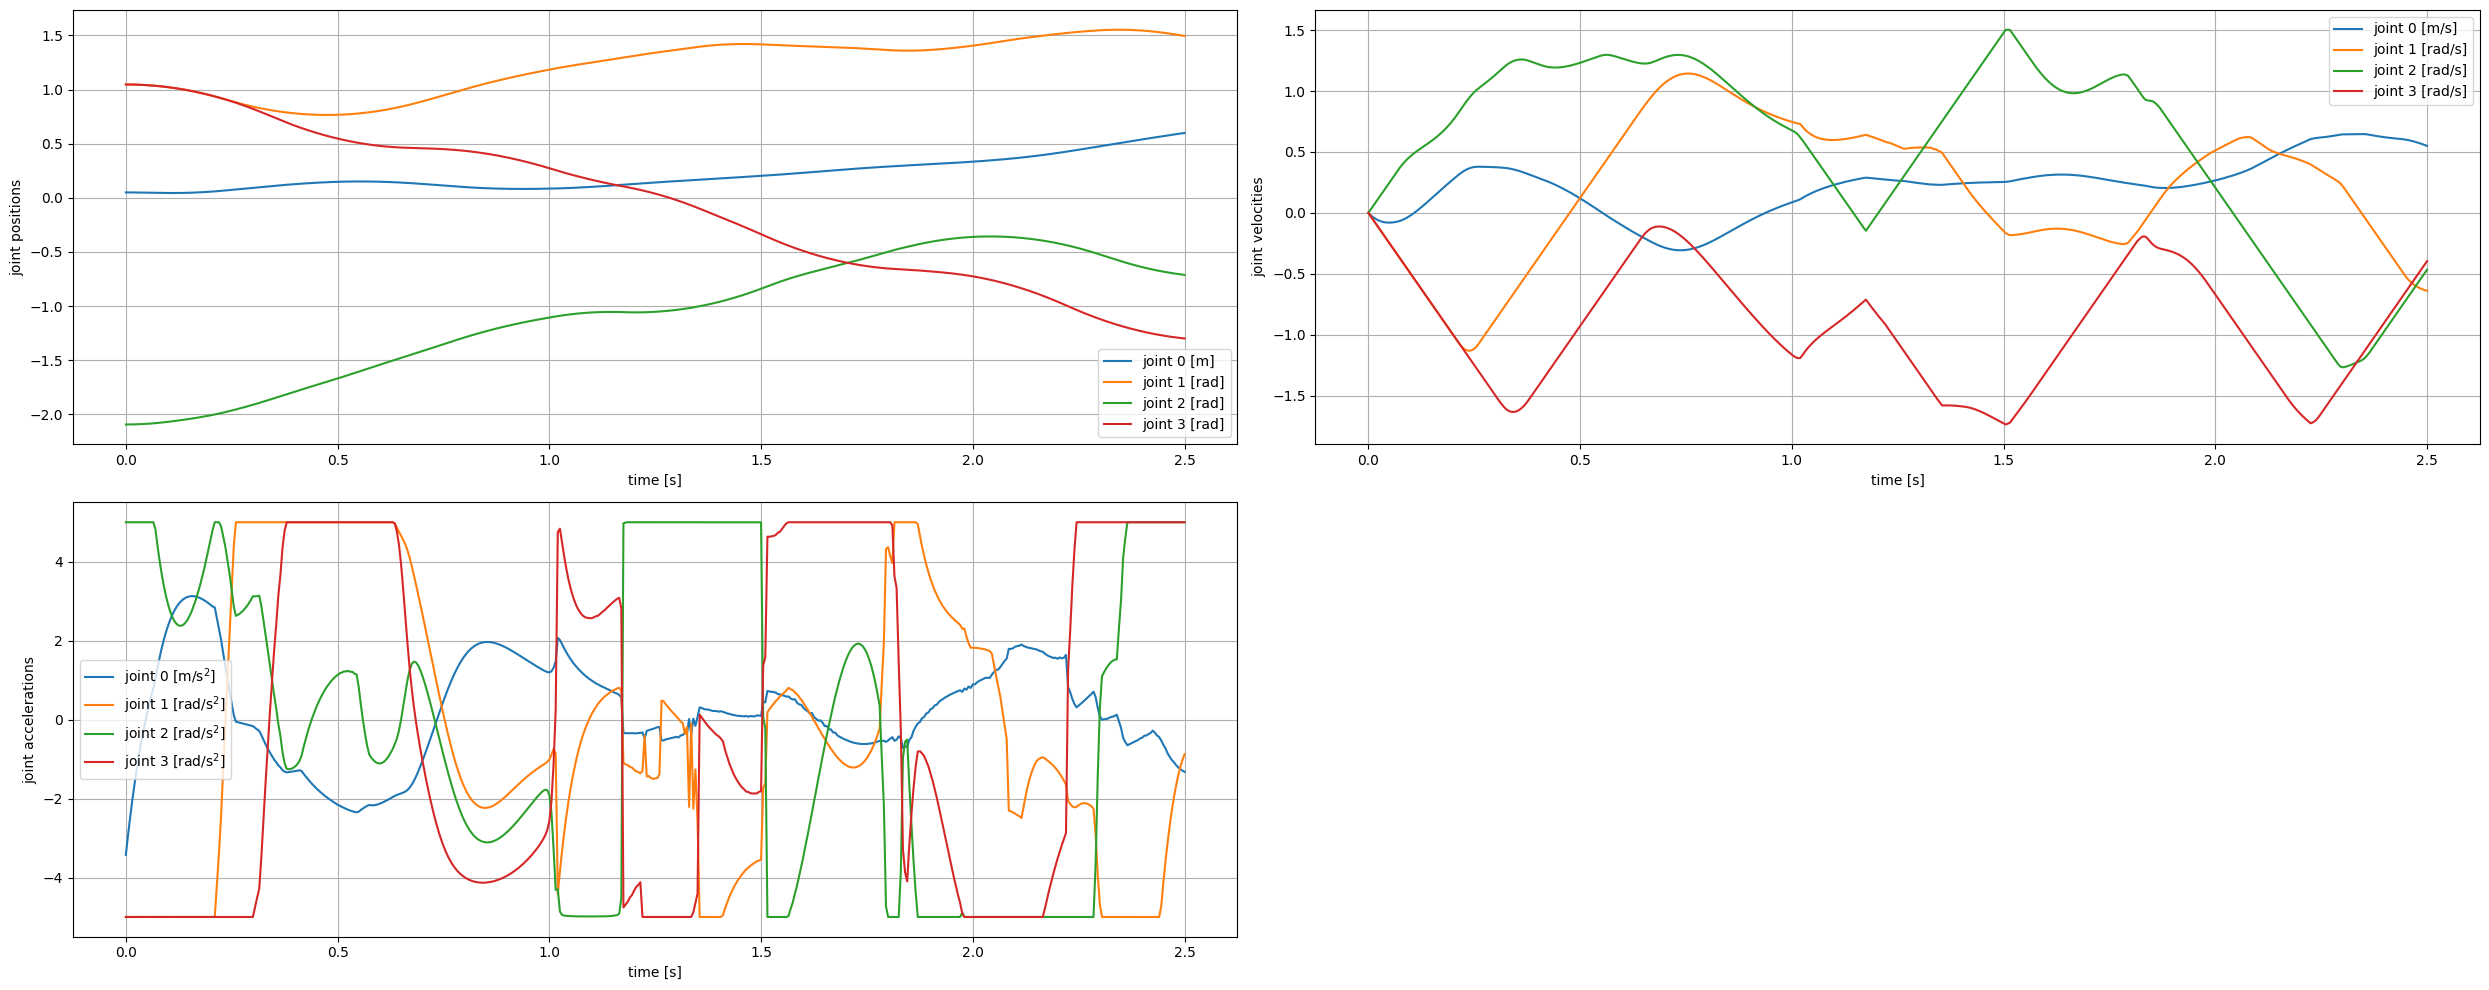

In [63]:
plot_experiment_dashboard(all_logs,keys[-1])

In [10]:
import matplotlib.pyplot as plt

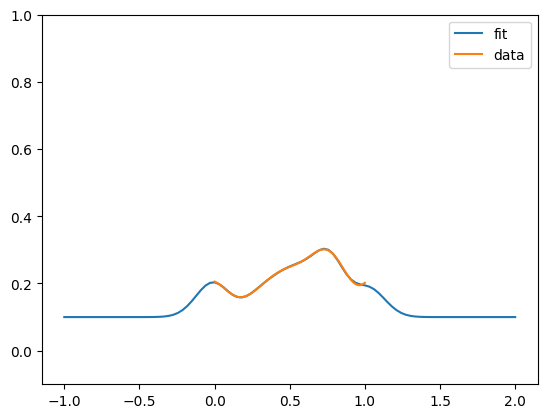

In [11]:
####################
# Create simulator #
####################
from helper_functions import generate_train_and_test_data, create_simulator, get_h
train_data, test_data = generate_train_and_test_data()
simulator = create_simulator(test_data)

In [12]:
from helper_functions import fit_rbf

In [13]:
f_test = fit_rbf(test_data, num_basis=10)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



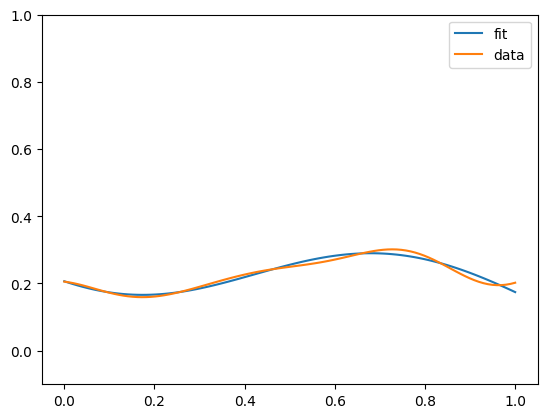

In [14]:
x_test = np.linspace(0,1,100)
y_fit = f_test(x_test).full().flatten()

plt.plot(x_test,y_fit)  
plt.plot(x_test,test_data)
plt.ylim(-0.1,1)
plt.legend(['fit','data'])

In [15]:
# Necessary to make it work in docker container...
import plotly.io as pio
pio.renderers.default='iframe'

In [16]:
from pseudo_etasl import utils

In [119]:
df_cont = pd.DataFrame(all_logs['horizon_20'])

utils.plot_output(df_cont,"w")

In [120]:
experiment_name = 'horizon_20'
model_type = experiment_parameters[experiment_name]['model_type']
# h,_,_,_ = get_h(model_type)
h,_,_,_ = get_h(model_type, custom_b_flag=True, custom_b_data=train_data[22].flatten())
animation = plot_animation(simulator,all_logs,experiment_name,h,stride=1)

In [121]:
animation

In [107]:
animation.write_html(experiment_name+"_with_prior.html")